In [31]:
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
import pickle

In [3]:
data = pd.read_parquet('./data/green_tripdata_2021-01.parquet')

In [4]:
data.dtypes

VendorID                          int64
lpep_pickup_datetime     datetime64[ns]
lpep_dropoff_datetime    datetime64[ns]
store_and_fwd_flag               object
RatecodeID                      float64
PULocationID                      int64
DOLocationID                      int64
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
ehail_fee                        object
improvement_surcharge           float64
total_amount                    float64
payment_type                    float64
trip_type                       float64
congestion_surcharge            float64
dtype: object

In [5]:
data['duration'] = data['lpep_dropoff_datetime'] - data['lpep_pickup_datetime']
data.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
0,2,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.0,43,151,1.0,1.01,5.5,...,0.5,0.00,0.0,None,0.3,6.80,2.0,1.0,0.00,0 days 00:03:56
1,2,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.0,166,239,1.0,2.53,10.0,...,0.5,2.81,0.0,None,0.3,16.86,1.0,1.0,2.75,0 days 00:08:45
2,2,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.0,41,42,1.0,1.12,6.0,...,0.5,1.00,0.0,None,0.3,8.30,1.0,1.0,0.00,0 days 00:05:58
3,2,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,8.0,...,0.5,0.00,0.0,None,0.3,9.30,2.0,1.0,0.00,0 days 00:07:05
4,2,2021-01-01 00:16:36,2021-01-01 00:16:40,N,2.0,265,265,3.0,0.00,-52.0,...,-0.5,0.00,0.0,None,-0.3,-52.80,3.0,1.0,0.00,0 days 00:00:04


In [6]:
data.duration = data.duration.apply(lambda td: td.total_seconds()/60)
data.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
0,2,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.0,43,151,1.0,1.01,5.5,...,0.5,0.00,0.0,None,0.3,6.80,2.0,1.0,0.00,3.933333
1,2,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.0,166,239,1.0,2.53,10.0,...,0.5,2.81,0.0,None,0.3,16.86,1.0,1.0,2.75,8.750000
2,2,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.0,41,42,1.0,1.12,6.0,...,0.5,1.00,0.0,None,0.3,8.30,1.0,1.0,0.00,5.966667
3,2,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,8.0,...,0.5,0.00,0.0,None,0.3,9.30,2.0,1.0,0.00,7.083333
4,2,2021-01-01 00:16:36,2021-01-01 00:16:40,N,2.0,265,265,3.0,0.00,-52.0,...,-0.5,0.00,0.0,None,-0.3,-52.80,3.0,1.0,0.00,0.066667


In [7]:
data = data[(data.duration >= 1) & (data.duration <= 60)]

In [8]:
categorical = ['PULocationID','DOLocationID']
numerical = ['trip_distance']

In [9]:
data[categorical] = data[categorical].astype('str')

In [11]:
train_dicts = data[categorical+numerical].to_dict(orient='records')

In [12]:
dv = DictVectorizer()
x_train = dv.fit_transform(train_dicts)
x_train

<73908x507 sparse matrix of type '<class 'numpy.float64'>'
	with 221724 stored elements in Compressed Sparse Row format>

In [13]:
y_train = data.duration.values
y_train

array([ 3.93333333,  8.75      ,  5.96666667, ..., 11.        ,
       27.        , 10.        ])

In [14]:
model = LinearRegression()
model.fit(x_train,y_train)
preds = model.predict(x_train)

C:\Users\jugal\.conda\envs\mlops-zoomcamp\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jugal\.conda\envs\mlops-zoomcamp\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


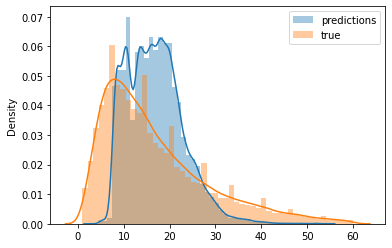

In [15]:
sns.distplot(preds,label='predictions')
sns.distplot(y_train,label='true')

plt.legend()


In [16]:
mean_squared_error(y_train,preds,squared=False)

9.827368941909368

In [17]:
def read_dataframe(file_name):
    
    if file_name.endswith('.csv'):
        data = pd.read_csv('data/'+file_name)
        
    else:
        data = pd.read_parquet('data/'+file_name)
        
    
    data['duration'] = data.lpep_dropoff_datetime - data.lpep_pickup_datetime
        
    data.duration = data.duration.apply(lambda dt: dt.total_seconds()/60)
        
    categorical = ['PULocationID','DOLocationID']
    numerical = ['trip_distance']
    
    data = data[(data.duration >= 1) & (data.duration <= 60)]
    
    data[categorical] = data[categorical].astype(str)

    return data

    

In [18]:
train_data = read_dataframe('green_tripdata_2021-01.parquet')
val_data = read_dataframe('green_tripdata_2021-02.parquet')

In [19]:
train_data.shape,val_data.shape

((73908, 21), (61921, 21))

In [20]:
train_data['PUDO'] = train_data['PULocationID'] + '_' + train_data['DOLocationID']
val_data['PUDO'] = val_data['PULocationID'] + '_' + val_data['DOLocationID']


In [21]:
categorical = ['PUDO']
numerical = ['trip_distance']

data_dicts = train_data[categorical+numerical].to_dict(orient='Records')
data_dicts

[{'PUDO': '43_151', 'trip_distance': 1.01},
 {'PUDO': '166_239', 'trip_distance': 2.53},
 {'PUDO': '41_42', 'trip_distance': 1.12},
 {'PUDO': '168_75', 'trip_distance': 1.99},
 {'PUDO': '75_75', 'trip_distance': 0.45},
 {'PUDO': '225_265', 'trip_distance': 12.19},
 {'PUDO': '244_244', 'trip_distance': 3.39},
 {'PUDO': '75_213', 'trip_distance': 6.69},
 {'PUDO': '74_238', 'trip_distance': 2.34},
 {'PUDO': '74_60', 'trip_distance': 5.48},
 {'PUDO': '42_41', 'trip_distance': 0.9},
 {'PUDO': '74_116', 'trip_distance': 2.08},
 {'PUDO': '116_143', 'trip_distance': 4.64},
 {'PUDO': '75_42', 'trip_distance': 1.68},
 {'PUDO': '74_75', 'trip_distance': 0.68},
 {'PUDO': '7_82', 'trip_distance': 2.7},
 {'PUDO': '152_117', 'trip_distance': 29.07},
 {'PUDO': '116_74', 'trip_distance': 2.78},
 {'PUDO': '116_69', 'trip_distance': 2.25},
 {'PUDO': '259_116', 'trip_distance': 0.0},
 {'PUDO': '247_167', 'trip_distance': 1.03},
 {'PUDO': '166_41', 'trip_distance': 0.65},
 {'PUDO': '74_119', 'trip_distance

In [22]:
x_train = dv.fit_transform(train_dicts)
val_dicts = val_data[categorical+numerical].to_dict(orient='records')
x_val = dv.transform(val_dicts)

In [23]:
y_train = train_data.duration.values
y_val = val_data.duration.values

In [24]:
y_train,y_val

(array([ 3.93333333,  8.75      ,  5.96666667, ..., 11.        ,
        27.        , 10.        ]),
 array([17.91666667,  6.5       , 15.25      , ..., 14.        ,
         7.        ,  7.        ]))

In [25]:
lr = LinearRegression()
lr.fit(x_train,y_train)

y_pred = lr.predict(x_val)

mean_squared_error(y_val,y_pred,squared=False)

12.948606599931619

In [27]:
with open('models/lin_reg.bin','wb') as f:
    pickle.dump((dv,lr),f)


In [32]:
lasso = Lasso(0.01)
lasso.fit(x_train,y_train)

y_pred = lasso.predict(x_val)

mean_squared_error(y_val,y_pred,squared=False)

12.360141920496279